In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
#Reading file Travel_Time
Path = r'C:\Users\Dhwani\Desktop\AppoMania\googleplaystore.csv'
googleStoreDf = pd.read_csv(Path,parse_dates=True)
googleStoreDf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
googleStoreDf.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [4]:
googleStoreDf = googleStoreDf.dropna()

In [5]:
googleStoreDf.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lmDf = googleStoreDf[['Category','Rating','Reviews','Content Rating','Price']].copy()

In [8]:
lmDf.dtypes

Category           object
Rating            float64
Reviews             int64
Content Rating     object
Price              object
dtype: object

In [9]:
#lmDf = googleStoreDf[['Price']].copy()
lmDf['Price'] = lmDf['Price'].astype('object').str.replace('$', '')
lmDf['Price'] = pd.to_numeric(lmDf['Price'])
lmDf = lmDf[(lmDf.Price != 0)]
lmDf.count()

Category          645
Rating            645
Reviews           645
Content Rating    645
Price             645
dtype: int64

In [10]:
y = lmDf[['Price']].copy()

In [11]:
X = lmDf.drop('Price',axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()
X["Category"] = obj.fit_transform(X["Category"].astype('object'))
X.head()

,Category,Rating,Reviews,Content Rating
234,3,4.7,11442,Everyone
235,3,4.8,10295,Everyone
290,3,4.7,11442,Everyone
291,3,4.8,10295,Everyone
427,4,4.0,18247,Everyone


In [13]:
X["Content Rating"] = obj.fit_transform(X["Content Rating"].astype('object'))
X.head()

,Category,Rating,Reviews,Content Rating
234,3,4.7,11442,0
235,3,4.8,10295,0
290,3,4.7,11442,0
291,3,4.8,10295,0
427,4,4.0,18247,0


In [14]:
y.count()

Price    645
dtype: int64

In [15]:
X.count()

Category          645
Rating            645
Reviews           645
Content Rating    645
dtype: int64

In [16]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(len(lm.coef_))

1


In [18]:
lm.predict(X)[0:5]

array([[18.95532731],
       [17.75551531],
       [18.95532731],
       [17.75551531],
       [26.45587803]])

Text(0,0.5,'predicted price')

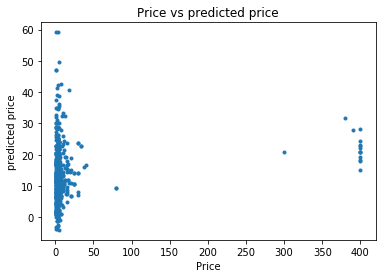

In [20]:
#print(y)
plt.scatter(y,lm.predict(X),marker='.')
plt.title('Price vs predicted price')
plt.xlabel('Price')
plt.ylabel('predicted price')

In [21]:
from sklearn.model_selection import train_test_split

team1X_train, team1X_test, team1Y_train, team1Y_test = train_test_split(X, y, random_state=1)

In [22]:
lm.fit(team1X_train,team1Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
team1Predict_train = lm.predict(team1X_train)
team1Predict_test = lm.predict(team1X_test)

In [24]:
lmMSE = round(np.mean(np.subtract(team1Y_train.values,team1Predict_train) ** 2),3)
print(lmMSE)

3381.238
